## 1. Introduction - Time Series Analysis

From https://builtin.com/data-science/time-series-python:

Across industries, organizations commonly use time series data, which means any information collected over a regular interval of time, in their operations. Examples include daily stock prices, energy consumption rates, social media engagement metrics and retail demand, among others. **Analyzing time series data yields insights like trends, seasonal patterns and forecasts into future events that can help generate profits. For example, by understanding the seasonal trends in demand for retail products, companies can plan promotions to maximize sales throughout the year.**

When analyzing time series data, you should undertake a number of steps. **First, you need to check for stationarity and autocorrelation.** Stationarity is a way to measure if the data has structural patterns like seasonal trends. Autocorrelation occurs when future values in a time series linearly depend on past values. You need to check for both of these in time series data because they’re assumptions that are made by many widely used methods in time series analysis. For example, the autoregressive integrated moving average (ARIMA) method for forecasting time series assumes stationarity. Further, linear regression for time series forecasting assumes that the data has no autocorrelation. Before conducting these processes, then, you need to know if the data is viable for the analysis.

**During a time series analysis in Python, you also need to perform trend decomposition and forecast future values.** Decomposition allows you to visualize trends in your data, which is a great way to clearly explain their behavior. Finally, forecasting allows you to anticipate future events that can aid in decision making. You can use many different techniques for time series forecasting, but here, we will discuss the autoregressive integrated moving average (ARIMA).

We will explore time series analysis on a stock price dataset.

## 2. Import Libraries/Datasets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-time-series-20050101-to-20171231/CAT_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UTX_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PFE_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PG_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UNH_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/JNJ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/VZ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AABA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/BA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/KO_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MCD_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MRK_

## 3. Choose Dataset to Import

There is a lot of data involved (it is a dataset of historical stock prices (from 2006-2018) for 29 of 30 Dow Jones Industrial Average companies); we will only research Google and the trend of its stock over the given period.

In [2]:
df = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv')

##  4. Explore the Dataset

Let's look at the basic foundations of the dataset (variables, size, distributions, nulls/non-nulls, etc).

In [3]:
df.head()

Date    Open    High     Low   Close    Volume   Name
0  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
1  2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2  2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
3  2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
4  2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

* 7 variables:

    * Date = Date of activity being recorded (in format: yy-mm-dd)
    
    * Open = price of the stock at market open (this is NYSE data so all in USD)
    
    * High = highest price reached in the day
    
    * Low = lowest price reached in the day
    
    * Close = final price when trading day completed
    
    * Volume = number of shares traded
    
    * Name = the stock's ticker symbol

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


* 3,019 days recorded in the dataset

In [5]:
df.shape

(3019, 7)

In [6]:
df.nunique()

Date      3019
Open      2880
High      2855
Low       2875
Close     2919
Volume    3019
Name         1
dtype: int64

In [7]:
df.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.850000  5.211410e+05
25%     247.775000   250.190000   244.035000   247.605000  1.760854e+06
50%     310.480000   312.810000   307.790000   310.080000  2.517630e+06
75%     572.140000   575.975000   565.900000   570.770000  4.242182e+06
max    1083.020000  1086.490000  1072.270000  1085.090000  4.118289e+07

In [8]:
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
Name      False
dtype: bool

* **To conclude, it is a dataset with 3,019 trading days of data and with the open, high, low, and close of each day. Most variables have fairly unique amount of values for each and have similar data ranges (open, high, low, close especially). There are no null data entries within the dataset.**

## 5. Data Preprocessing

There is some interesting data, so let us create new variables and just analyze what we have.

In [3]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df['Date'], format = '%Y/%m/%d')
df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

In [4]:
# Check new columns
df['OpenClose'] = (df['Close'] - df['Open'])/df['Open']
df['HighVsLow'] = (df['High'] - df['Low'])/df['Open']
df['GainLoss'] = (df["Close"] >= df["Open"]) 
df['Year'], df['Month'], df['Day'] = df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day

df.head()

Date    Open    High     Low   Close    Volume   Name  OpenClose  \
0 2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL   0.030075   
1 2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL   0.003016   
2 2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL   0.011782   
3 2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL   0.019243   
4 2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL   0.001028   

   HighVsLow  GainLoss  Year  Month  Day  
0   0.041282      True  2006      1    3  
1   0.020750      True  2006      1    4  
2   0.022534      True  2006      1    5  
3   0.037785      True  2006      1    6  
4   0.026731      True  2006      1    9

* **In this section, we reformatted the date column so we could use it in time series analysis, as well as to create new columns (year month and day), along with creating new columns that note if each day is either a day where the stock experienced capital appreciation or not ("GainLoss"), and the precentage changes between the close and open ("OpenClose") and the high and the low ("HighVsLow").**

## 6. Exploratory Data Analysis

IndexError: index 5 is out of bounds for axis 0 with size 5

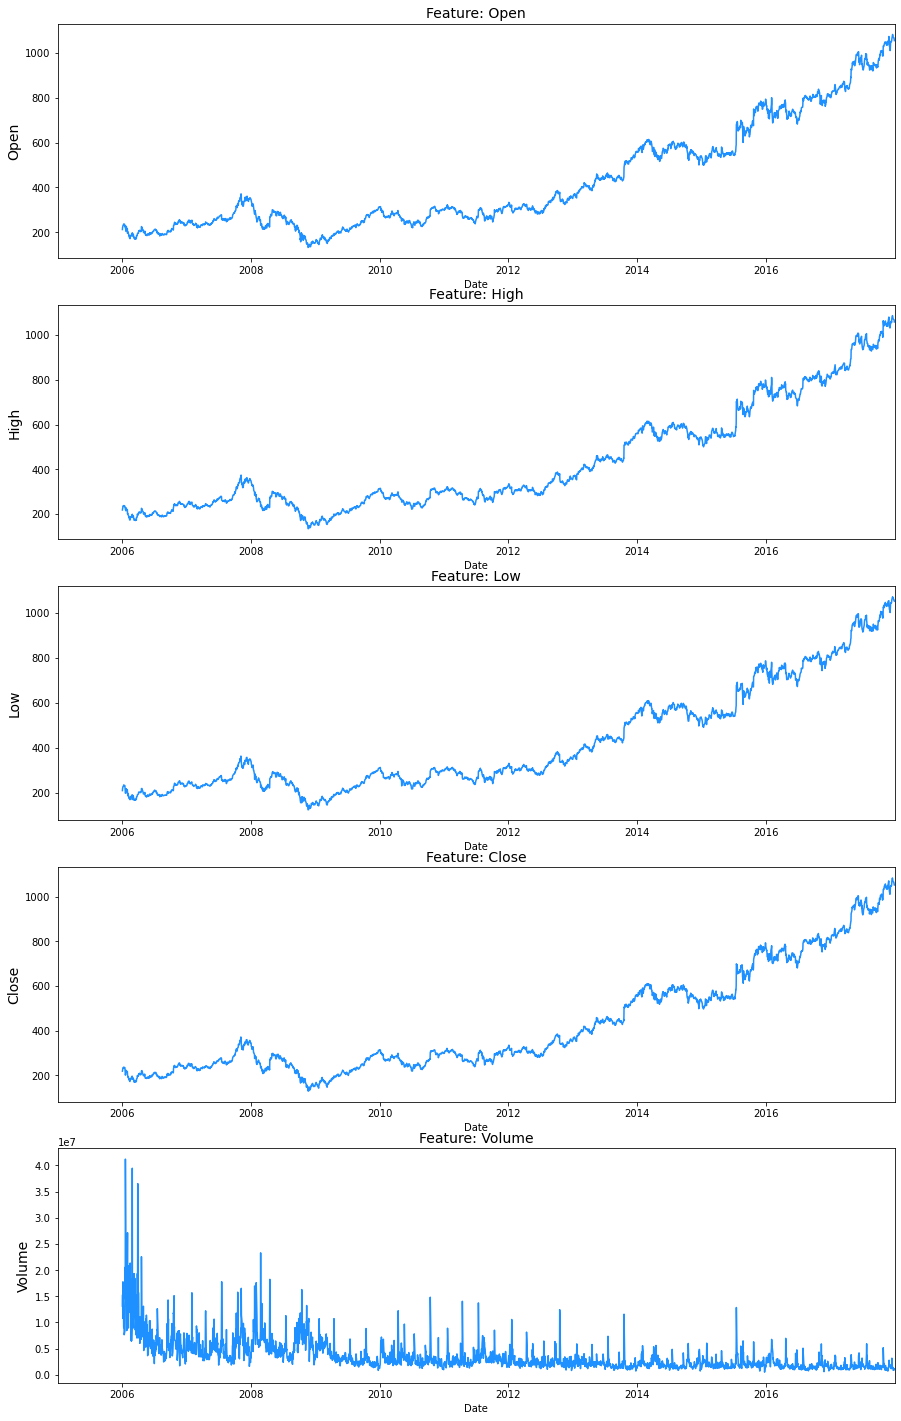

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2005, 1, 1), date(2017, 12, 31)])    

* You can see they are all very intertwined, as it relates to open, high, low, close.


* Interesting that volume lessened the way that it did as time went on...maybe simply considered a more steady holding than in years prior?

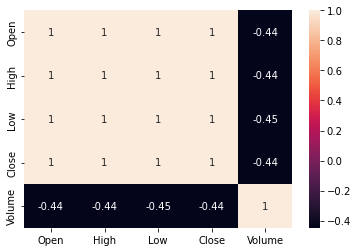

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* As is evident above, there are perfect correlations between open, close, high and low variables; and there are similar negative correlations of these variables with volume.

* Let us begin analysis on a multivariate basis.

<AxesSubplot:xlabel='Date'>

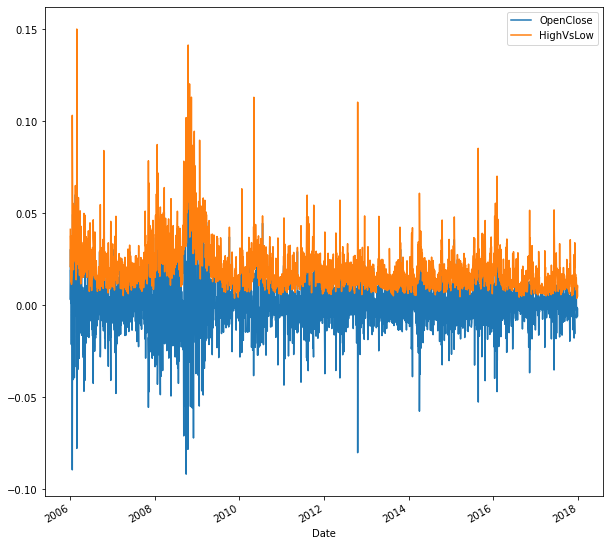

In [14]:
df.plot(x="Date", y=["OpenClose", "HighVsLow"],
        kind="line", figsize=(10, 10))

* This relationship is interesting in that the more a stock loses money, the greater the discrepancy between the high and low price of the day, hence the greater HighVsLow discrepancies on days when more was lost...but also when the stock gains a lot, the same effect is had. But generally, it appears the graphs mirror each other most especially when Google suffered major daily losses; and you can see over time as the losses lessened over the time period, so did the price volatility (difference between high price and low price).

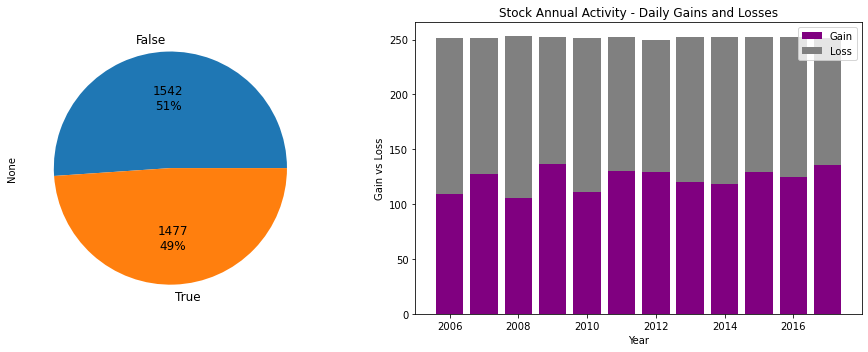

In [15]:
Year = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Gain = np.array([len(df.loc[(df['Year'] == 2006) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2007) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2008) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2009) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2010) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2011) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2012) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2013) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2014) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2015) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2016) & (df['GainLoss'] == True)]),
        len(df.loc[(df['Year'] == 2017) & (df['GainLoss'] == True)])])
Loss = np.array([len(df.loc[(df['Year'] == 2006) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2007) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2008) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2009) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2010) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2011) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2012) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2013) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2014) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2015) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2016) & (df['GainLoss'] == False)]),
        len(df.loc[(df['Year'] == 2017) & (df['GainLoss'] == False)])])

plt.figure(figsize=(13,5))

axe1 = plt.subplot(121)
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
axe1 = df.groupby("GainLoss").size().plot(kind="pie",autopct=label_function, textprops={'fontsize': 12})

axe2 = plt.subplot(122)
plt.bar(Year, Gain, color='purple')
plt.bar(Year, Loss, bottom=Gain, color='gray')
plt.xlabel("Year")
plt.ylabel("Gain vs Loss")
plt.legend(["Gain", "Loss"])
plt.title("Stock Annual Activity - Daily Gains and Losses")

plt.tight_layout()

plt.show()

* Interestingly, it is about even, the amount of days Google experienced stock price gains and stock price losses, though losses edge out gains slightly.

* there are typically about 250 trading days a year and 2009, which appears to be the rebound year of the Great Recession era, appears to be the year between 2006 and 2018 with the highest amount of daily gains in the calendar year, and it does not surpass 150 trading days. *Even with a stock that seems to be as strong as Google, it is amazing how much it is in the long-run a toss-up on whether a stock will gain or lose on a given day.*

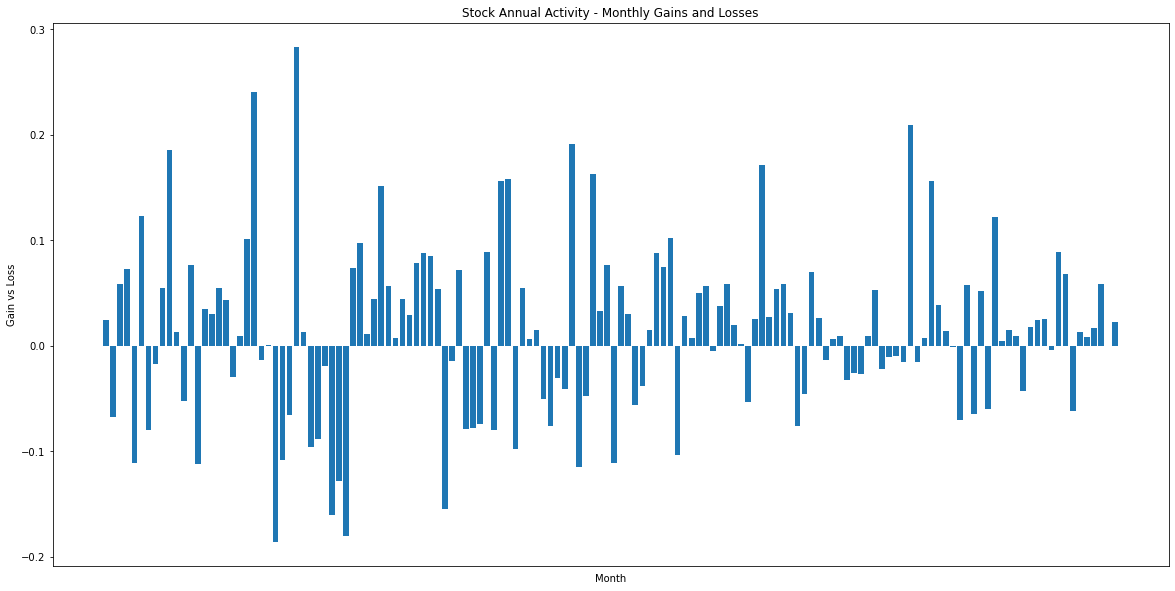

In [24]:
monthly = {}
for year in list(df['Year'].unique()):
    for month in list(df['Month'].unique()):
        result = ((df.loc[(df['Month'] == month) & (df['Year'] == year)].iloc[-1]["Close"]) - \
                 (df.loc[(df['Month'] == month) & (df['Year'] == year)].iloc[0]["Open"])) / \
                 (df.loc[(df['Month'] == month) & (df['Year'] == year)].iloc[0]["Open"])
        monthly[str(month)+"/"+str(year)] = result

months = list(monthly.keys())
results = list(monthly.values())

plt.figure(figsize=(20,10))
plt.bar(range(len(monthly)), results)
plt.xlabel("Month")
plt.xticks([])
#plt.locator_params(axis='x', nbins=12)
plt.ylabel("Gain vs Loss")
plt.title("Stock Annual Activity - Monthly Gains and Losses")
plt.show()

* It appears there were more concentration of monthly losses/gain in the earlier of the years recorded than in the later years, which would make sense when you consider the Great Recession in 2008 and the effects that such moments have on the market.

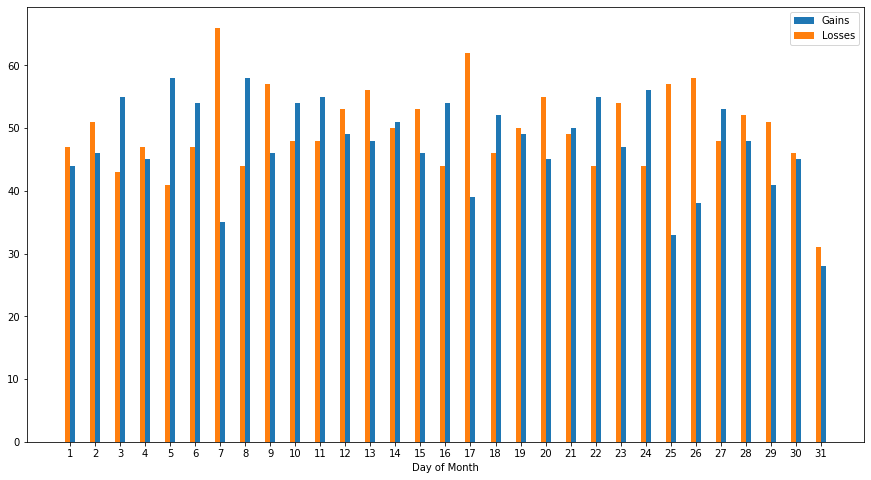

In [26]:
unique_days = sorted([day for day in df['Day'].unique()]) #list of different days of the month in the dataset
total_gains = {}
total_losses = {}
for val in unique_days:
    gains = len(df.loc[(df['Day'] == val) & (df['GainLoss'] == True)]); total_gains[val] = gains
    losses = len(df.loc[(df['Day'] == val) & (df['GainLoss'] == False)]); total_losses[val] = losses

fig, ax1 = plt.subplots(1,1, figsize=(15,8))

ax1.bar(total_gains.keys(), total_gains.values(), width=0.2, align='edge', label='Gains')
ax1.bar(total_losses.keys(), total_losses.values(), width=-0.2, align='edge', label='Losses')
ax1.set_xticks(unique_days)
ax1.set_xlabel('Day of Month')
ax1.legend()

plt.show()

* Just for interest, above is a chart comparing gains and looses of GOOGL stock on each particular day of a given month over the time period (1 to 31).

* There are some days (see 7th, 17th, 25th, 26th) where the stock very clearly tends to lose more often than gain on said day, and other days (3rd, 5th, 8th, 16th, 22nd, 24th) that the stock appears to gain more often than lose, while a lot of days have nondescript (immaterial) discrepancies between gains and losses.

## 7. Time Series Analysis

Now that we have some sense of the data we are working with, let's now conduct time series analysis. First, we will test stationarity visually and with the augmented Dickey-Fuller test; then we will test autocorrelation; then we will decompose the data, and finally forecast.

#### 7A. Stationarity

From https://builtin.com/data-science/time-series-python:

Stationarity is a key part of time series analysis. Simply put, stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).

We will use the Dickey Fuller test to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.

These values allow us to test the degree to which present values change with past values. If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

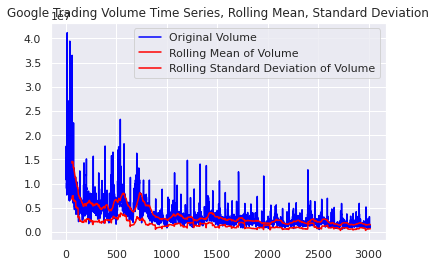

In [34]:
rolling_mean = df['Volume'].rolling(60).mean()
rolling_std = df['Volume'].rolling(60).std()

plt.plot(df['Volume'], color="blue",label="Original Volume")
plt.plot(rolling_mean, color="red", label="Rolling Mean of Volume")
plt.plot(rolling_std, color="red", label="Rolling Standard Deviation of Volume")

plt.title("Google Trading Volume Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

plt.show()

In [35]:
#Augmented Dickey-Fuller

from statsmodels.tsa.stattools import adfuller
adft = adfuller(df['Volume'],autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -5.733723e+00              Test Statistics
1  6.510720e-07                      p-value
2  2.800000e+01             No. of lags used
3  2.990000e+03  Number of observations used
4 -3.432539e+00          critical value (1%)
5 -2.862507e+00          critical value (5%)
6 -2.567285e+00         critical value (10%)


* **Data that has a P-Value > 5% and a Test Statistics > critical value (5%) is said to not be stationary, and simultaneously have trends and/or seasonal patterns.** For our data, as calculated by the augmented Dickey-Fuller test, the P-Value = 0.00000065, and the Test Statistic (-5.7) < critical value at 5% (-2.9); this would indicate the data is stationary, without trends or true seasonal patterns. This can also be assumed by the constancy of the rolling mean and rolling standard deviation of the GOOGL stock trading volume over the time period.

#### 7B. Autocorrelation

From https://builtin.com/data-science/time-series-python:

Checking time series data for autocorrelation in Python is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values, which has huge implications across many industries. For example, if airline passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.

In [12]:
autocorrelation_lag1 = df['Volume'].autocorr(lag=90)
print("Three Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = df['Volume'].autocorr(lag=120)
print("Four Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['Volume'].autocorr(lag=150)
print("Five Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['Volume'].autocorr(lag=180)
print("Six Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.4291229538281732
Four Month Lag:  0.39691162711400646
Five Month Lag:  0.3790647294424583
Six Month Lag:  0.42802956188113195


* This is weak to very moderate autocorrelation --- high trading volume one period of time doesn't necessarily mean high trading volume the next, which is evident in the visual spikes we glean from looking at the data.

#### 7C. Decomposition

Trend decomposition is another useful way to visualize the trends in time series data.

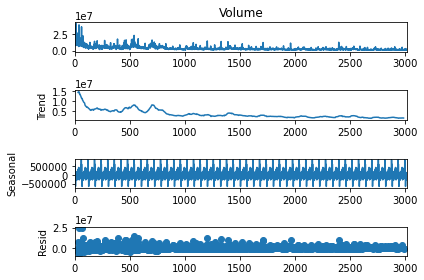

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Volume'],model='additive', period=60)
decompose.plot()
plt.show()

* We see a trend of volume that has leveled off over the timeframe recorded, seeming pretty constant regardless of the point in time.

#### 7D. Forecasting

In this section, we will try various methods of univariate forecasting, including the ARIMA method, the Prophet method, and the LSTM method. **We will forecast volume, as it is the most stationary data available in the dataset.**

<AxesSubplot:>

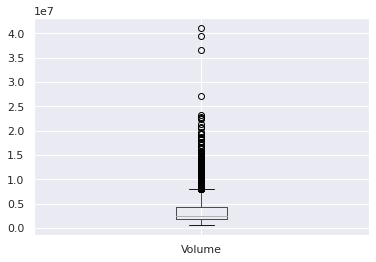

In [36]:
df.boxplot(column=['Volume'])

* **There are a lot of outliers, particularly due to the early years; this is something to keep in mind**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


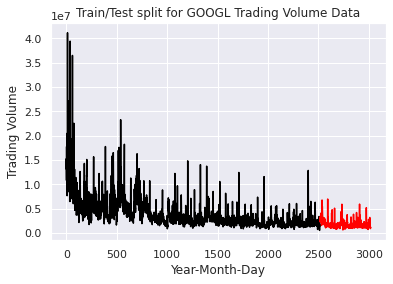

In [21]:
#df.index = df['Date']
train = df.loc[(df['Date'] < pd.to_datetime("2016-01-01", format='%Y/%m/%d'))]
train['train'] = train['Volume']
#del train['Date']
del train['Volume']
del train['Name']
test = df.loc[df['Date'] >= pd.to_datetime("2016-01-01", format='%Y/%m/%d')]
#del test['Date']
test['test'] = test['Volume']
del test['Volume']
del test['Name']
test.head()
plt.plot(train['train'], color = "black")
plt.plot(test['test'], color = "red")
plt.title("Train/Test split for GOOGL Trading Volume Data")
plt.ylabel("Trading Volume")
plt.xlabel('Year-Month-Day')
sns.set()
plt.show()

#### 7D1. ARIMA

From https://neptune.ai/blog/arima-vs-prophet-vs-lstm:

ARIMA is a class of time series prediction models, and the name is an abbreviation for AutoRegressive Integrated Moving Average. The backbone of ARIMA is a mathematical model that represents the time series values using its past values. This model is based on two main features: 

**Past Values**: Clearly, past behaviour is a good predictor of the future. The only question is how many past values we should use. The model uses the last p time series values as features. Here p is a hyperparameter that needs to be determined when we design the model.

**Past Errors**: The model can use the information on how well it has performed in the past. Thus, we add as features the most recent q errors the model made. Again, q is a hyperparameter. 

An important aspect here is that the time series needs to be standardized such that the model becomes independent from seasonal or temporary trends. The formal term for this is that we want the model to be trained on a stationary time series. In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time.

There are several approaches to making a time series stationary, the most popular being differencing. By replacing the n values in the series with the n-1 differences, we force the model to learn more advanced patterns. When the model predicts a new value, we simply add the last observed value to it in order to obtain a final prediction. 

In [22]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
model_a = auto_arima(train['train'], trace=True, error_action='ignore', suppress_warnings=True)
model_a.fit(train['train'])
forecast_arima = model_a.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=80802.063, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80470.340, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=80214.699, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80800.073, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=80033.587, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=80030.708, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=80354.110, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=80032.547, Time=2.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=80020.499, Time=2.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=80060.274, Time=1.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=80021.470, Time=2.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=80029.547, Time=1.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=80017.786, Time=4.95 sec
 ARIMA(3,1,3)(0,0,0)[0] i

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test['test'],forecast_arima))
print("RMSE: ", rms)

RMSE:  1863490.4149379877


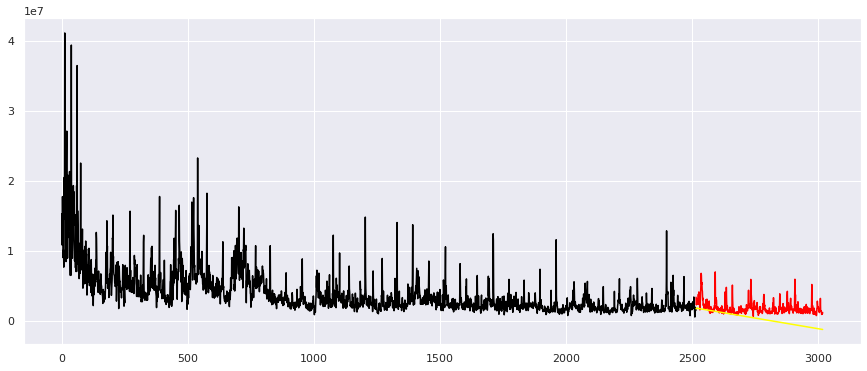

In [24]:
forecast_1 = pd.DataFrame(forecast_arima) #,index = test.index,columns=['Prediction']
forecast_1.rename(columns={0:'Prediction'}, inplace=True)
#forecast_1.set_index(test.index)
#forecast_1

plt.figure(figsize=(15,6))
plt.plot(train['train'], color = "black", label='Train')
plt.plot(test['test'], color = "red", label='Test')
plt.plot(forecast_1['Prediction'], color = "yellow", label='Prediction')
plt.show()

* Very obviously not a great fit; of note is that the result got worse the more data that I trained on.

* Let's look at the diagnostics of the model;

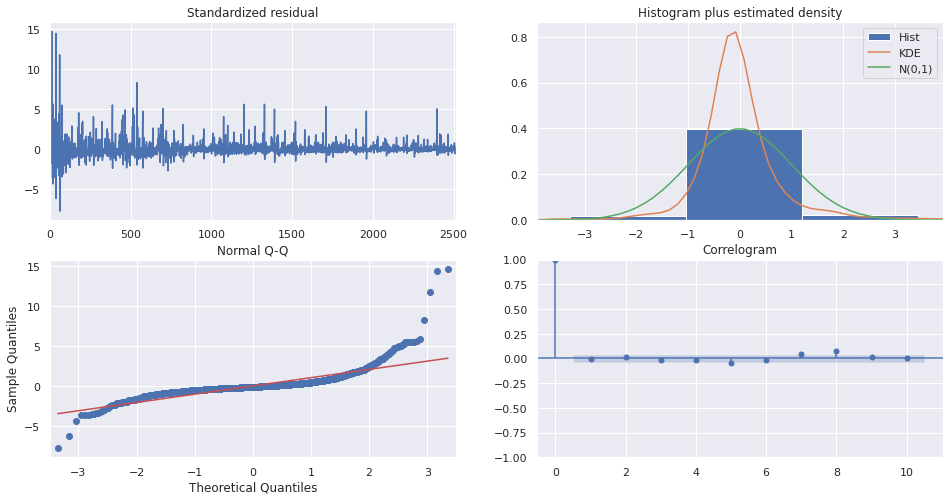

In [25]:
model_a.plot_diagnostics(figsize=(16,8))
plt.show()

So how to interpret the plot diagnostics?

Top left **(Plot of Standardized Residuals)**: The residual errors seem to fluctuate around a mean of zero and have a variance between (-5, 15), the variability primarily occurring in the earlier data in the dataset.

Top Right **(Density Plot)**: The density plot suggest normal distribution with mean zero. KDE is much steeper than the histogram, meaning much of the data is within one standard deviation from the mean.

Bottom left **(QQ - Plot)**: Most of the blue dots are over the red line; after +2 does seem to have a material amount of points off of the line of normalcy, meaning more positive skew (as would be assumed with the high levels of volume in the earlier years).

Bottom Right **(Correlogram)**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated; there is no pattern in upwards or downward movement, and Moran's I (the correlation coefficient that measures the autocorrelation; the Y axis) is small, which means little clustering or dispersion.

#### 7D2. Prophet

From https://neptune.ai/blog/arima-vs-prophet-vs-lstm:

Prophet FB was developed by Facebook as an algorithm for the in-house prediction of time series values for different business applications. Therefore, it is specifically designed for the prediction of business time series.

It is an additive model consisting of four components:

y[t] = g(t) + s(t) + h(t) + e[t]

g(t): It represents the trend and the objective is to capture the general trend of the series. For example, the number of advertisements views on Facebook is likely to increase over time as more people join the network. But what would be the exact function of increase?

s(t): It is the Seasonality component. The number of advertisement views might also depend on the season. For example, in the Northern hemisphere during the summer months, people are likely to spend more time outdoors and less time in from of their computers. Such seasonal fluctuations can be very different for different business time series. The second component is thus a function that models seasonal trends. 

h(t): The Holidays component. We use the information for holidays which have a clear impact on most business time series. Note that holidays vary between years, countries, etc. and therefore the information needs to be explicitly provided to the model.

The error term e[t] stands for random fluctuations that cannot be explained by the model. As usual, it is assumed that e[t] follows a normal distribution N (0, σ2) with zero mean and unknown variance σ that has to be derived from the data.


In [26]:
from prophet import Prophet

model_p = Prophet()

model_p.fit(train[["Date", "train"]].rename(columns={"Date": "ds", "train": "y"}))

forecast_prophet = model_p.predict(test[["Date", "test"]].rename(columns={"Date": "ds"}))

22:14:01 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Calculate metrics
score_mae = mean_absolute_error(test['test'], forecast_prophet.tail(len(test))['yhat'])
score_rmse = math.sqrt(mean_squared_error(test['test'], forecast_prophet.tail(len(test))['yhat']))

print('RMSE: {}'.format(score_rmse))

RMSE: 1109874.8376845855


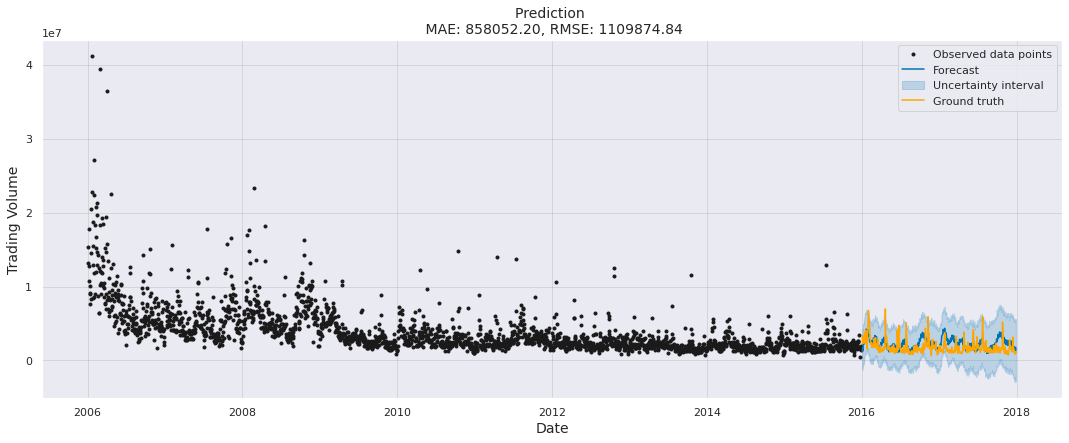

In [28]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_p.plot(forecast_prophet, ax=ax)
sns.lineplot(x=test['Date'], y=test['test'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Trading Volume', fontsize=14)

plt.show()

* An improvement from ARIMA as far as tracing the ground truth data, and improved RMSE results.

#### 7D3. LSTM

From https://neptune.ai/blog/arima-vs-prophet-vs-lstm:

LSTM stands for Long short-term memory. LSTM cells are used in recurrent neural networks that learn to predict the future from sequences of variable lengths. Note that recurrent neural networks work with any kind of sequential data and, unlike ARIMA and Prophet, are not restricted to time series. 

The main idea behind LSTM cells is to learn the important parts of the sequence seen so far and forget the less important ones. This is achieved by the so-called gates, i.e., functions that have different learning objectives such as: 

1. a compact representation of the time series seen so far
2. how to combine new input with the past representation of the series
3. what to forget about the series
4. what to output as a prediction for the next time step. 

Designing an optimal LSTM based model can be a difficult task that requires careful hyperparameter tuning. Here is the list of the most important parameters an LSTM based model needs to consider:

* How many LSTM cells are to use in order to represent the sequence? Note that each LSTM cell will focus on specific aspects of the time series processed so far. A few LSTM cells are unlikely to capture the structure of the sequence while too many LSTM cells might lead to overfitting.

* It is typical that first, we convert the input sequence into another sequence, i.e. the values ht. This yields a new representation as the ht states capture the structure of the series processed so far. But at some point, we won’t need all htvalues but rather only the last ht. This will allow us to feed the different ht’s into a fully connected layer as each ht corresponds to the final output of an individual LSTM cell. Designing the exact architecture might require careful finetuning and many trials.

In [29]:
from sklearn.preprocessing import MinMaxScaler

univariate_df = df[['Date', 'Volume']].copy()
univariate_df.columns = ['ds', 'y']

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.68972537],
       [-0.63672954],
       [-0.74682544],
       [-0.57605413],
       [-0.6981267 ],
       [-0.78890288],
       [-0.79126517],
       [-0.76380575],
       [-0.82442764],
       [-0.80782531]])

In [30]:
# Defines the rolling window
look_back = 0
# Split into train and test sets
train, test = scaled_data[:len(train)-look_back,:], scaled_data[len(train)-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

2516 503


In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model_l = Sequential()
model_l.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_l.add(LSTM(64, return_sequences=False))
model_l.add(Dense(25))
model_l.add(Dense(1))

# Compile the model
model_l.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model_l.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model_l.summary()

Epoch 1/5
2516/2516 [==============================] - 16s 5ms/step - loss: 0.0131 - val_loss: 7.8130e-04
Epoch 2/5
2516/2516 [==============================] - 12s 5ms/step - loss: 0.0070 - val_loss: 0.0040
Epoch 3/5
2516/2516 [==============================] - 12s 5ms/step - loss: 0.0069 - val_loss: 0.0011
Epoch 4/5
2516/2516 [==============================] - 12s 5ms/step - loss: 0.0067 - val_loss: 0.0035
Epoch 5/5
2516/2516 [==============================] - 13s 5ms/step - loss: 0.0067 - val_loss: 0.0050
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 128)            66048     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1625      
__

In [32]:
# Lets predict with the model
train_predict = model_l.predict(x_train)
test_predict = model_l.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))

RMSE: 2871909.48304502


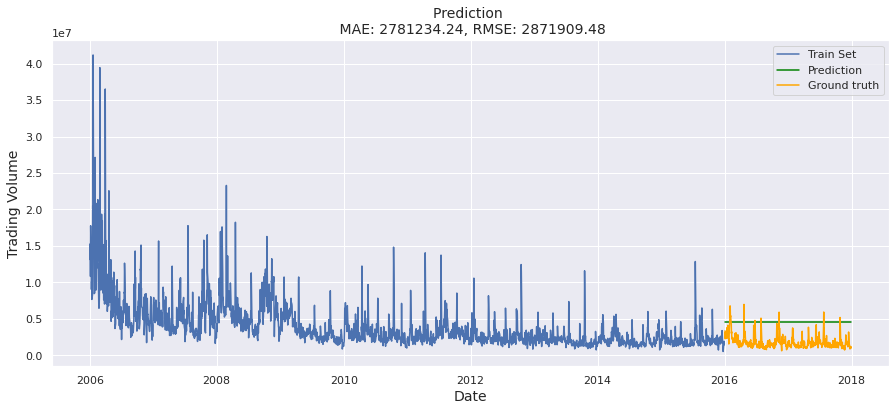

In [33]:
x_train_ticks = univariate_df.head(len(train))['ds']
y_train = univariate_df.head(len(train))['y']
x_test_ticks = univariate_df.tail(len(test))['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Trading Volume', fontsize=14)

plt.show()

* Highest RME of the three methods; not much of a predictor for this data, even compared to the ARIMA model.

## 8. Conclusion

We ran a time series analysis on historical data of Google's stock trading volume from 2006 to 2017. RMSEs were high likely as a result of the data and the historical changes in trading volume; with that said, the Prophet model was the best performer, and traced the ground truth data fairly well, while the ARIMA and LSTM models did not seem to follow the ground truth data in any way. LSTM was the worst performer in general, but of note is that ARIMA's relative performance varied the most; when trained on less data, the ARIMA method actually was the better performer than the Prophet method, which could be due to the temporary trend of higher volumes in the early years in some way.